In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
window_size=20
import yfinance as yf
from yahoofinancials import YahooFinancials
from datetime import *

In [2]:
start = datetime(2020, 1, 3)
end = datetime.now()

df = pd.DataFrame()
df = yf.download('TSLA', start=start, end=end, progress=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
#compute daily returns and 20 day moving historical volatility
df['returns']=df['Close'].pct_change()
df['volatility']=df['returns'].rolling(window_size).std()*(252**0.5)
X = df['volatility'].values

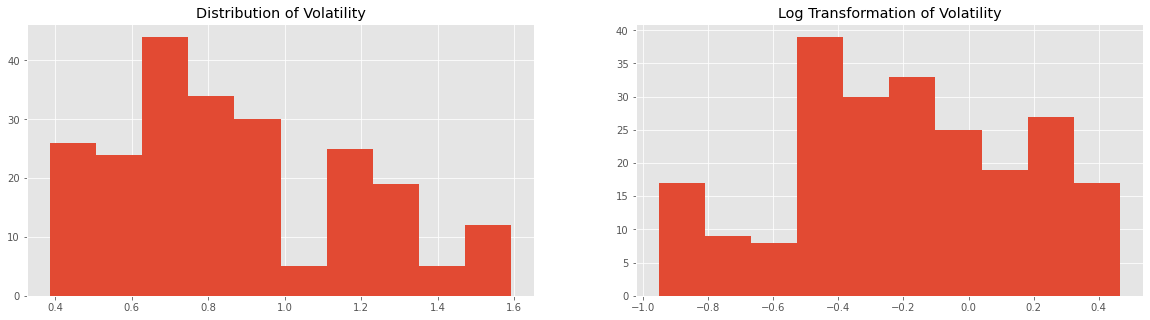

In [4]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(X)
plt.title('Distribution of Volatility')
plt.subplot(122)
plt.hist(np.log(X))
plt.title('Log Transformation of Volatility')
plt.show();

In [5]:
from statsmodels.tsa.stattools import adfuller

df = df.fillna(0.0)
X = df['volatility'].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.817719
p-value: 0.055787
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
